In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
data = pd.read_csv("housing.csv")

In [162]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


```python
data.dropna(inplace=True)
```

      data: Este é o DataFrame no qual a operação será realizada.

      dropna: Este é o método que executa a operação de remoção de valores nulos.

      inplace=True: Este é um argumento opcional que, quando definido como True, faz com que a operação seja realizada no próprio DataFrame em vez de criar um novo DataFrame. Ou seja, os valores nulos são removidos diretamente do DataFrame original.

In [164]:
data.dropna(inplace=True)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


```python
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']
```

    from sklearn.model_selection import train_test_split: Isso importa a função train_test_split do módulo model_selection da biblioteca scikit-learn. Essa função é frequentemente usada para dividir conjuntos de dados em conjuntos de treinamento e teste.

    x = data.drop(['median_house_value'], axis=1): Aqui, você está criando um DataFrame x que contém todas as colunas do DataFrame original data, exceto aquela rotulada como 'median_house_value'. Essa coluna geralmente contém os rótulos/targets que o modelo tentará prever.

    y = data['median_house_value']: Aqui, você está criando uma Série y que contém apenas a coluna 'median_house_value' do DataFrame original data. Essa série geralmente contém os rótulos/targets correspondentes aos dados de entrada x. Em problemas de regressão, como o preço de casas (presumivelmente o que está sendo tratado aqui), 'median_house_value' geralmente representa a variável que o modelo tentará prever.

In [166]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']


In [167]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [168]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

```python
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
```

      train_test_split(x, y, test_size=0.2): Esta função recebe dois conjuntos de dados, x e y, representando as características e os rótulos, respectivamente. O argumento test_size=0.2 especifica que 20% dos dados serão utilizados como conjunto de teste, enquanto os 80% restantes serão utilizados como conjunto de treinamento.

      x_train, x_test, y_train, y_test: Os conjuntos de treinamento e teste resultantes são atribuídos a quatro variáveis diferentes. x_train e y_train representam as características e rótulos do conjunto de treinamento, respectivamente, enquanto x_test e y_test representam as características e rótulos do conjunto de teste, respectivamente.

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

```python
train_data = x_train.join(y_train)
```

      x_train.join(y_train): Esta expressão está utilizando o método join do DataFrame x_train para combinar as características de treinamento (x_train) com a Série y_train (rótulos de treinamento). O join é feito com base nos índices dos DataFrames/Séries.

      train_data = ...: O resultado da operação x_train.join(y_train) é atribuído à variável train_data. Portanto, train_data será um DataFrame que contém as características de treinamento e os rótulos de treinamento.

In [170]:
train_data = x_train.join(y_train)

In [171]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15139,-116.91,32.85,21.0,4152.0,703.0,2255.0,697.0,4.5096,<1H OCEAN,159500.0
2040,-119.67,36.73,27.0,2845.0,417.0,1219.0,460.0,4.9196,INLAND,117900.0
19129,-122.67,38.24,29.0,2644.0,464.0,1372.0,450.0,5.0544,<1H OCEAN,261800.0
6547,-118.01,34.05,31.0,1135.0,355.0,1717.0,368.0,2.1602,<1H OCEAN,161700.0
4147,-118.20,34.13,50.0,2929.0,588.0,1931.0,574.0,3.3438,<1H OCEAN,173600.0
...,...,...,...,...,...,...,...,...,...,...
488,-122.26,37.86,52.0,2888.0,604.0,1253.0,538.0,3.3893,NEAR BAY,241700.0
17812,-121.86,37.39,17.0,1777.0,328.0,1235.0,329.0,5.4225,<1H OCEAN,258100.0
8421,-118.35,33.93,26.0,3156.0,857.0,2394.0,787.0,3.0100,<1H OCEAN,191900.0
10744,-117.92,33.61,36.0,1025.0,150.0,316.0,126.0,10.3048,<1H OCEAN,500001.0


```python
train_data.hist(figsize=(15, 8))
```

      train_data.hist(figsize=(15, 8)): Aqui, você está chamando o método hist diretamente no DataFrame train_data. O argumento figsize=(15, 8) define o tamanho da figura do histograma.

      A função hist gera histogramas para cada coluna numérica no DataFrame. Cada histograma mostra a distribuição da frequência dos valores em uma determinada coluna.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

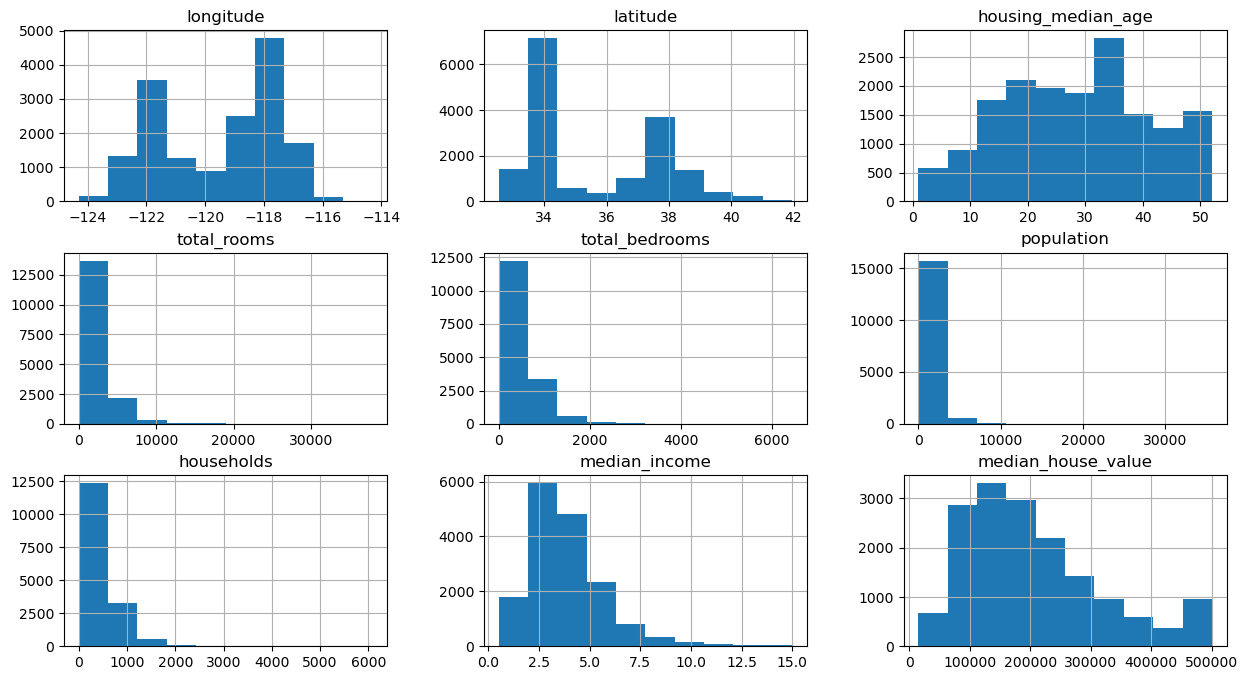

In [172]:
train_data.hist(figsize=(15, 8))

```python
train_data_numeric = train_data.select_dtypes(include=['number'])
correlation_matrix = train_data_numeric.corr()
```

      train_data_numeric = train_data.select_dtypes(include=['number']): Esta linha cria um novo DataFrame chamado train_data_numeric que contém apenas as colunas numéricas do DataFrame train_data. A função select_dtypes é usada para selecionar colunas com tipos de dados numéricos.

      correlation_matrix = train_data_numeric.corr(): Aqui, a matriz de correlação é calculada usando o método corr() no DataFrame train_data_numeric. A matriz de correlação mostra como as diferentes variáveis numéricas estão relacionadas entre si. Cada entrada na matriz representa a correlação entre duas variáveis, variando de -1 a 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e 0 indica ausência de correlação.

In [173]:
train_data_numeric = train_data.select_dtypes(include=['number'])
correlation_matrix = train_data_numeric.corr()


In [174]:
correlation_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924494,-0.098987,0.046467,0.071038,0.102619,0.058459,-0.016639,-0.039443
latitude,-0.924494,1.000000,0.002067,-0.035327,-0.066498,-0.110071,-0.072705,-0.076910,-0.148456
housing_median_age,-0.098987,0.002067,1.000000,-0.365206,-0.322904,-0.295057,-0.304387,-0.122918,0.101960
total_rooms,0.046467,-0.035327,-0.365206,1.000000,0.928840,0.853428,0.916929,0.199290,0.133826
total_bedrooms,0.071038,-0.066498,-0.322904,0.928840,1.000000,0.874291,0.978553,-0.009610,0.049099
population,0.102619,-0.110071,-0.295057,0.853428,0.874291,1.000000,0.905025,0.006115,-0.025260
households,0.058459,-0.072705,-0.304387,0.916929,0.978553,0.905025,1.000000,0.012487,0.065362
median_income,-0.016639,-0.076910,-0.122918,0.199290,-0.009610,0.006115,0.012487,1.000000,0.685476
median_house_value,-0.039443,-0.148456,0.101960,0.133826,0.049099,-0.025260,0.065362,0.685476,1.000000


```python
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
```

    plt.figure(figsize=(15, 8)): Esta linha define o tamanho da figura para o gráfico. O argumento figsize=(15, 8) especifica que a largura será 15 unidades e a altura será 8 unidades.

    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu"): Aqui, a função heatmap da biblioteca seaborn é usada para criar o mapa de calor. Os argumentos fornecidos são:
    correlation_matrix: A matriz de correlação que será visualizada.
    annot=True: Isso adiciona valores numéricos nas células do mapa de calor, indicando os valores das correlações.
    cmap="YlGnBu": Especifica o esquema de cores usado para o mapa de calor. Neste caso, está sendo utilizado o esquema de cores "YlGnBu" que varia de tons de amarelo (Yl) a verde (Gn) e azul (Bu), indicando diferentes intensidades de correlação.

<Axes: >

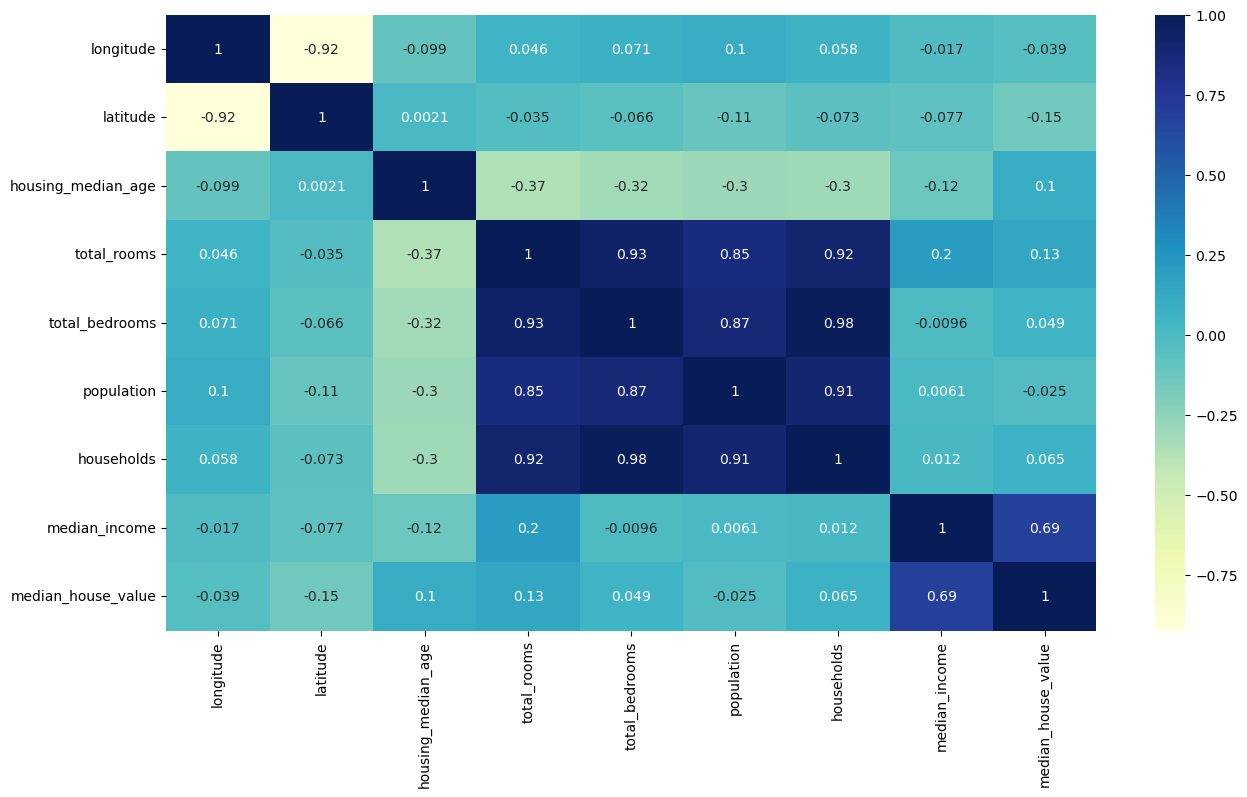

In [175]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

```python
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
```

    train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1): Aqui, a coluna 'total_rooms' está sendo transformada com o logaritmo natural. A adição de 1 antes de aplicar o logaritmo é comum para evitar problemas quando há valores zero, já que o logaritmo natural de 0 é indefinido.

    train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1): A mesma transformação logarítmica está sendo aplicada à coluna 'total_bedrooms'.

    train_data['population'] = np.log(train_data['population'] + 1): Similarmente, a coluna 'population' está sendo transformada com o logaritmo natural.

    train_data['households'] = np.log(train_data['households'] + 1): A coluna 'households' está sendo transformada com o logaritmo natural.

In [176]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

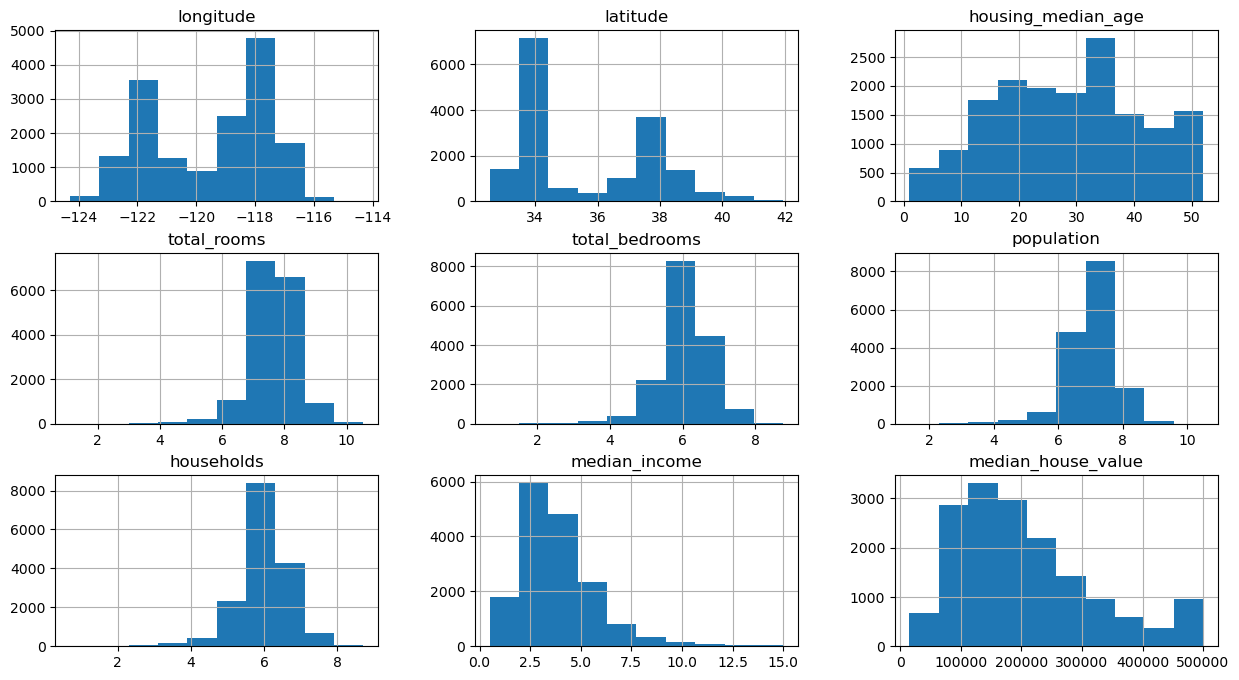

In [177]:
train_data.hist(figsize=(15, 8))

In [178]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7204
INLAND        5207
NEAR OCEAN    2122
NEAR BAY      1809
ISLAND           4
Name: count, dtype: int64

```python
pd.get_dummies(train_data.ocean_proximity) 
```

      train_data.ocean_proximity: Isso seleciona a coluna 'ocean_proximity' do DataFrame train_data.

      pd.get_dummies(...): Essa função do pandas converte variáveis categóricas em variáveis dummy. Para cada valor único na coluna 'ocean_proximity', ela cria uma nova coluna, e cada entrada nessa coluna será 1 se a categoria estiver presente e 0 caso contrário.

In [179]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15139,True,False,False,False,False
2040,False,True,False,False,False
19129,True,False,False,False,False
6547,True,False,False,False,False
4147,True,False,False,False,False
...,...,...,...,...,...
488,False,False,False,True,False
17812,True,False,False,False,False
8421,True,False,False,False,False
10744,True,False,False,False,False


```python
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
```

    pd.get_dummies(train_data.ocean_proximity): Esta parte cria variáveis dummy (ou one-hot encoding) para a coluna 'ocean_proximity'. O one-hot encoding é uma técnica para representar variáveis categóricas como vetores binários. Cada categoria única na coluna 'ocean_proximity' é convertida em uma nova coluna, e cada entrada nessa coluna será 1 se a categoria estiver presente e 0 caso contrário.

    .join(...): Adiciona essas novas colunas dummy ao DataFrame train_data.

    .drop(['ocean_proximity'], axis=1): Remove a coluna original 'ocean_proximity' do DataFrame train_data. Isso é feito após a criação das variáveis dummy para evitar multicolinearidade, onde uma variável pode ser prevista por outras variáveis no conjunto de dados.

In [180]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [181]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15139,-116.91,32.85,21.0,8.331586,6.556778,7.721349,6.548219,4.5096,159500.0,True,False,False,False,False
2040,-119.67,36.73,27.0,7.953670,6.035481,7.106606,6.133398,4.9196,117900.0,False,True,False,False,False
19129,-122.67,38.24,29.0,7.880426,6.142037,7.224753,6.111467,5.0544,261800.0,True,False,False,False,False
6547,-118.01,34.05,31.0,7.035269,5.874931,7.448916,5.910797,2.1602,161700.0,True,False,False,False,False
4147,-118.20,34.13,50.0,7.982758,6.378426,7.566311,6.354370,3.3438,173600.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,-122.26,37.86,52.0,7.968666,6.405228,7.134094,6.289716,3.3893,241700.0,False,False,False,True,False
17812,-121.86,37.39,17.0,7.483244,5.796058,7.119636,5.799093,5.4225,258100.0,True,False,False,False,False
8421,-118.35,33.93,26.0,8.057377,6.754604,7.781139,6.669498,3.0100,191900.0,True,False,False,False,False
10744,-117.92,33.61,36.0,6.933423,5.017280,5.758902,4.844187,10.3048,500001.0,True,False,False,False,False


```python
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
```

    plt.figure(figsize=(15, 8)): Esta linha define o tamanho da figura para o gráfico. O argumento figsize=(15, 8) especifica que a largura será 15 unidades e a altura será 8 unidades.

    sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu"): Aqui, a função heatmap da biblioteca seaborn é usada para criar o mapa de calor. Os argumentos fornecidos são:
    train_data.corr(): Isso calcula a matriz de correlação do DataFrame train_data. O mapa de calor será baseado nas correlações entre diferentes variáveis.
    annot=True: Isso adiciona valores numéricos nas células do mapa de calor, indicando os valores das correlações.
    cmap="YlGnBu": Especifica o esquema de cores usado para o mapa de calor. Neste caso, está sendo utilizado o esquema de cores "YlGnBu" que varia de amarelo (Yl) a verde (Gn) e azul (Bu), indicando diferentes intensidades de correlação.

<Axes: >

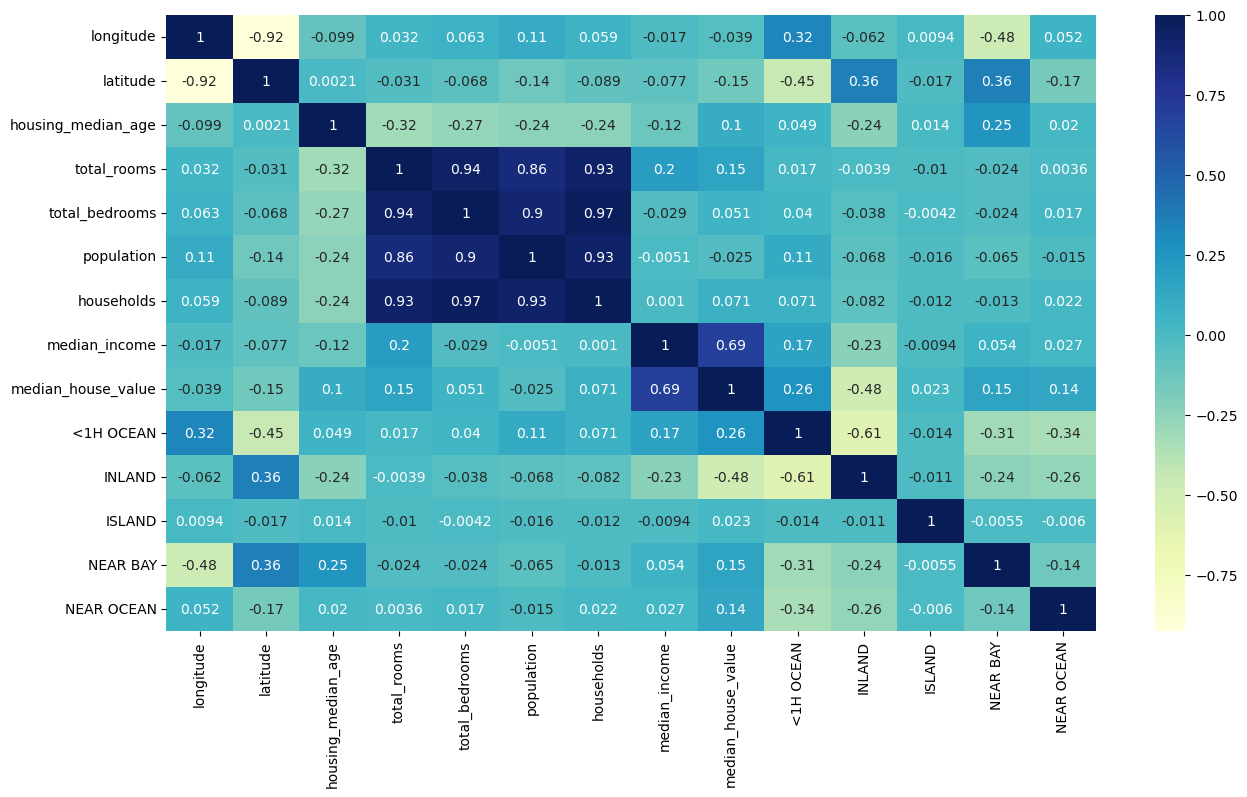

In [182]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

```python
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
```

    x="latitude": Indica que os valores de latitude serão plotados no eixo x.
    y="longitude": Indica que os valores de longitude serão plotados no eixo y.
    data=train_data: Especifica o DataFrame de onde os dados serão retirados.
    hue="median_house_value": A variável usada para colorir os pontos no gráfico. Neste caso, a coloração é baseada nos valores da coluna "median_house_value".
    palette="coolwarm": Especifica a paleta de cores a ser usada para a variável hue. A paleta "coolwarm" varia de tons frios (azuis) a tons quentes (vermelhos), indicando diferentes valores de "median_house_value".

<Axes: xlabel='latitude', ylabel='longitude'>

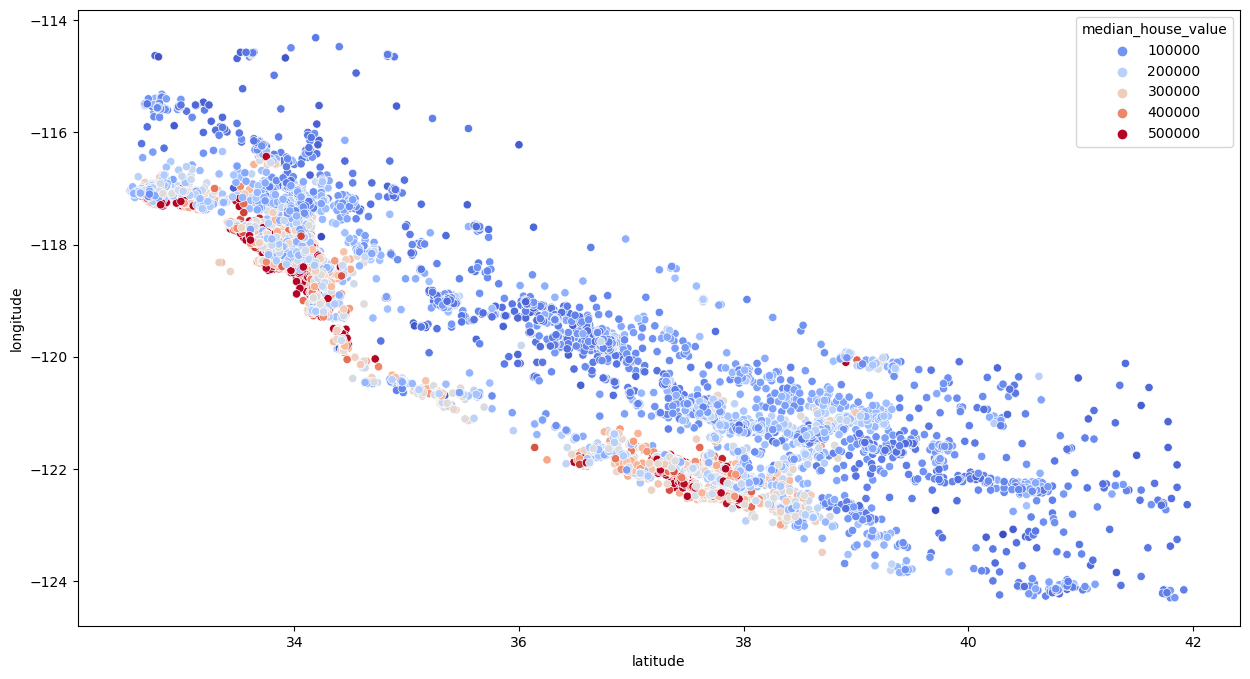

In [183]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [184]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

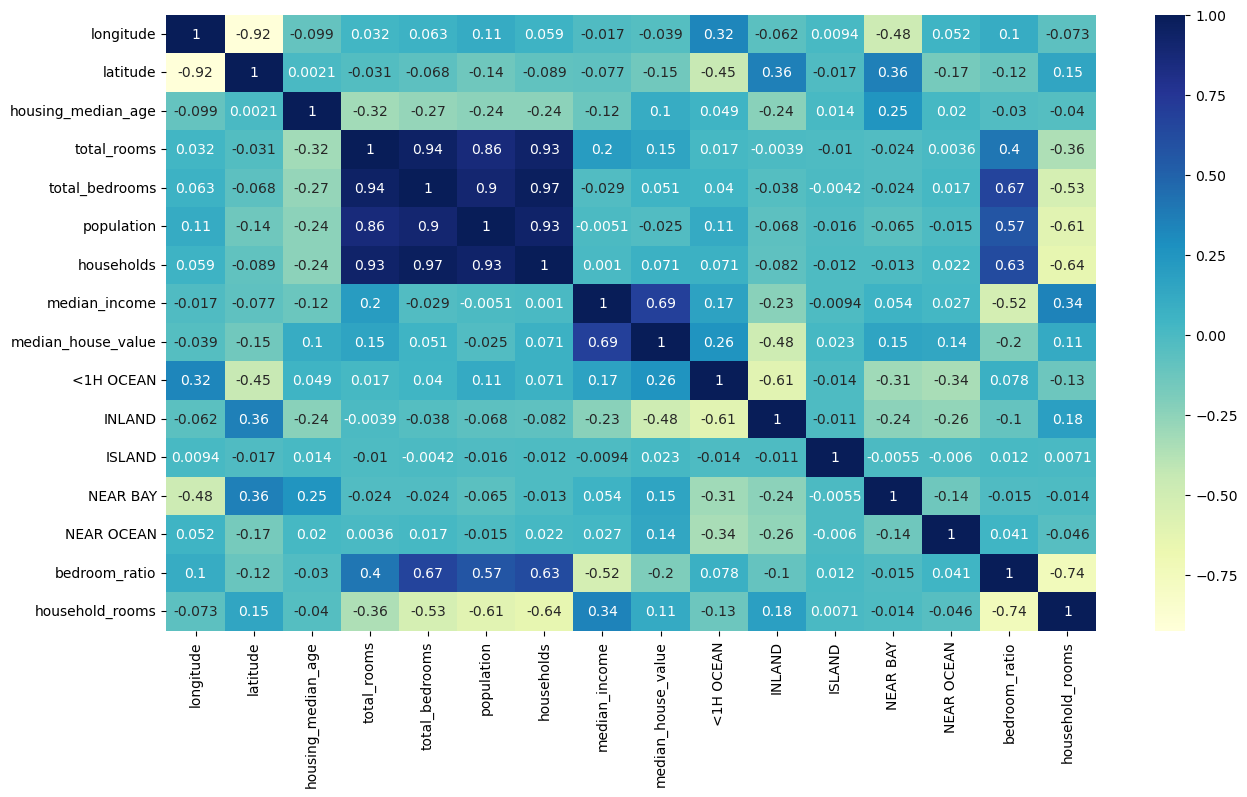

In [185]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [187]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [188]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
10019,-121.18,39.19,16.0,7.332369,5.863631,6.593045,5.768321,2.4688,138800.0,False,True,False,False,False,0.799691,1.271144
6264,-117.96,34.05,32.0,7.597898,5.963579,7.234177,5.942799,3.7258,181900.0,True,False,False,False,False,0.784899,1.278505
7862,-118.13,33.90,35.0,7.285507,5.568345,6.532334,5.468060,3.9038,202700.0,True,False,False,False,False,0.764304,1.332375
16223,-121.32,37.98,37.0,8.085795,6.467699,7.460490,6.501290,3.0660,94100.0,False,True,False,False,False,0.799884,1.243722
3076,-119.23,35.74,16.0,7.730175,6.492240,7.557473,6.421622,2.0330,68400.0,False,True,False,False,False,0.839857,1.203773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,-118.25,34.02,35.0,7.221836,6.188264,7.714231,6.135565,1.9130,114300.0,True,False,False,False,False,0.856882,1.177045
17369,-120.43,34.93,10.0,8.000014,6.373320,7.374002,6.333280,3.2850,218300.0,True,False,False,False,False,0.796664,1.263171
7523,-118.24,33.91,38.0,6.614726,5.030438,6.582025,5.081404,1.8750,102900.0,True,False,False,False,False,0.760491,1.301751
3101,-117.70,35.64,8.0,7.895063,6.033086,7.051856,5.991465,5.8625,109400.0,False,True,False,False,False,0.764159,1.317718


In [189]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
15139,-116.91,32.85,21.0,8.331586,6.556778,7.721349,6.548219,4.5096,159500.0,True,False,False,False,False,0.786978,1.272344
2040,-119.67,36.73,27.0,7.953670,6.035481,7.106606,6.133398,4.9196,117900.0,False,True,False,False,False,0.758830,1.296780
19129,-122.67,38.24,29.0,7.880426,6.142037,7.224753,6.111467,5.0544,261800.0,True,False,False,False,False,0.779404,1.289449
6547,-118.01,34.05,31.0,7.035269,5.874931,7.448916,5.910797,2.1602,161700.0,True,False,False,False,False,0.835068,1.190240
4147,-118.20,34.13,50.0,7.982758,6.378426,7.566311,6.354370,3.3438,173600.0,True,False,False,False,False,0.799025,1.256263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,-122.26,37.86,52.0,7.968666,6.405228,7.134094,6.289716,3.3893,241700.0,False,False,False,True,False,0.803802,1.266936
17812,-121.86,37.39,17.0,7.483244,5.796058,7.119636,5.799093,5.4225,258100.0,True,False,False,False,False,0.774538,1.290416
8421,-118.35,33.93,26.0,8.057377,6.754604,7.781139,6.669498,3.0100,191900.0,True,False,False,False,False,0.838313,1.208094
10744,-117.92,33.61,36.0,6.933423,5.017280,5.758902,4.844187,10.3048,500001.0,True,False,False,False,False,0.723637,1.431287


In [190]:
reg.score(x_test_s, y_test)

-0.6362706063121986

In [191]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [192]:
forest.score(x_test, y_test)

0.8259476726316458